In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
path_to_csv = "/content/drive/My Drive/Datathon_2020/filesForStartOfDatathon/"

In [118]:
import pandas as pd
import numpy as np

data = pd.read_csv(path_to_csv + "One Hot.csv") 
data.head()

,Unnamed: 0,segment_id,min_depth,max_depth,rate_of_penetration,surface_weight_on_bit,surface_rpm,wellbore_chev_no_id_0,wellbore_chev_no_id_1,wellbore_chev_no_id_2,wellbore_chev_no_id_3,wellbore_chev_no_id_4,wellbore_chev_no_id_5,wellbore_chev_no_id_6,wellbore_chev_no_id_8,wellbore_chev_no_id_9,wellbore_chev_no_id_10,wellbore_chev_no_id_11,wellbore_chev_no_id_12,wellbore_chev_no_id_13,wellbore_chev_no_id_15,wellbore_chev_no_id_17,wellbore_chev_no_id_18,wellbore_chev_no_id_20,wellbore_chev_no_id_21,wellbore_chev_no_id_22,wellbore_chev_no_id_23,wellbore_chev_no_id_24,area_id_0,area_id_1,formation_id_0,formation_id_1,formation_id_2,formation_id_3,formation_id_4,formation_id_5,formation_id_6,formation_id_7,formation_id_8,formation_id_9,...,bit_model_id_6,bit_model_id_8,bit_model_id_10,bit_model_id_11,bit_model_id_12,bit_model_id_13,bit_model_id_14,bit_model_id_15,bit_model_id_16,bit_model_id_17,bit_model_id_18,bit_model_id_19,bit_model_id_20,bit_model_id_21,bit_model_id_22,bit_model_id_23,bit_model_id_24,bit_model_id_25,bit_model_id_26,bit_model_id_27,bit_model_id_28,bit_model_id_29,bit_model_id_30,bit_model_id_31,bit_model_id_32,bit_model_id_33,bit_model_id_34,bit_model_id_36,bit_model_id_37,bit_model_id_39,bit_model_id_40,bit_model_id_42,bit_model_id_43,drillbit_size_8.5,drillbit_size_10.625,drillbit_size_12.25,drillbit_size_14.5,drillbit_size_16.5,drillbit_size_18.125,drillbit_size_26.0
0,0,wellbore_chev_no_0_727,21834.5,21839.5,99.614650,43.533280,150.369091,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,1,wellbore_chev_no_0_728,21840.0,21869.5,99.354021,42.382033,150.369001,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,2,wellbore_chev_no_0_729,21870.0,21899.5,83.622907,48.675129,150.429335,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,3,wellbore_chev_no_0_730,21900.0,21929.5,85.427731,30.041290,150.080000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,4,wellbore_chev_no_0_731,21930.0,21959.5,100.639811,31.406319,150.032167,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [119]:
y = data.loc[:, data.columns == "rate_of_penetration"]
y

,rate_of_penetration
0,99.614650
1,99.354021
2,83.622907
3,85.427731
4,100.639811
...,...
6833,69.847645
6834,65.763896
6835,66.727449
6836,66.639130


In [136]:
x = data.iloc[:, 2:7]
x

,min_depth,max_depth,rate_of_penetration,surface_weight_on_bit,surface_rpm
0,21834.5,21839.5,99.614650,43.533280,150.369091
1,21840.0,21869.5,99.354021,42.382033,150.369001
2,21870.0,21899.5,83.622907,48.675129,150.429335
3,21900.0,21929.5,85.427731,30.041290,150.080000
4,21930.0,21959.5,100.639811,31.406319,150.032167
...,...,...,...,...,...
6833,24810.0,24839.5,69.847645,20.770119,157.329500
6834,24840.0,24869.5,65.763896,15.634577,145.228103
6835,24870.0,24899.5,66.727449,15.356773,149.525177
6836,24900.0,24929.5,66.639130,16.970275,149.496551


In [137]:
x = x.loc[:, x.columns != "rate_of_penetration"]
x

,min_depth,max_depth,surface_weight_on_bit,surface_rpm
0,21834.5,21839.5,43.533280,150.369091
1,21840.0,21869.5,42.382033,150.369001
2,21870.0,21899.5,48.675129,150.429335
3,21900.0,21929.5,30.041290,150.080000
4,21930.0,21959.5,31.406319,150.032167
...,...,...,...,...
6833,24810.0,24839.5,20.770119,157.329500
6834,24840.0,24869.5,15.634577,145.228103
6835,24870.0,24899.5,15.356773,149.525177
6836,24900.0,24929.5,16.970275,149.496551


In [138]:
y_norm = (y - y.mean())/y.std()
y_norm

,rate_of_penetration
0,-0.134084
1,-0.138817
2,-0.424516
3,-0.391738
4,-0.115466
...,...
6833,-0.674693
6834,-0.748860
6835,-0.731360
6836,-0.732964


In [139]:
x_norm = (x-x.mean())/x.std()
x_norm

,min_depth,max_depth,surface_weight_on_bit,surface_rpm
0,0.387754,0.383523,0.579356,-0.233697
1,0.388712,0.388750,0.493204,-0.233700
2,0.393939,0.393977,0.964136,-0.231308
3,0.399167,0.399205,-0.430292,-0.245160
4,0.404394,0.404432,-0.328143,-0.247057
...,...,...,...,...
6833,0.906210,0.906257,-1.124083,0.042313
6834,0.911438,0.911484,-1.508391,-0.437558
6835,0.916665,0.916712,-1.529180,-0.267161
6836,0.921892,0.921939,-1.408437,-0.268296


In [140]:
x_norm.describe()

,min_depth,max_depth,surface_weight_on_bit,surface_rpm
count,6.838000e+03,6.838000e+03,6.838000e+03,6.838000e+03
mean,6.465531e-16,-3.379540e-16,-5.674964e-15,-1.932694e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.547525e+00,-2.549018e+00,-2.288994e+00,-3.793618e+00
25%,-8.083295e-01,-8.083121e-01,-7.066020e-01,-6.184809e-01
50%,7.507671e-02,7.510924e-02,8.918456e-02,1.347700e-01
75%,7.859835e-01,7.860282e-01,6.376211e-01,7.652572e-01
max,1.993480e+00,1.992020e+00,2.659329e+00,2.173218e+00


In [0]:
from sklearn import linear_model
clf = linear_model.Lasso(alpha= 0.01, max_iter = 100000)

In [142]:
clf.fit(x_norm, y_norm)

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=100000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [0]:
lasso_results = clf.coef_

In [144]:
lasso_results

array([-1.40648768e-01, -6.56348999e-05,  2.41599648e-01,  4.44356000e-01])

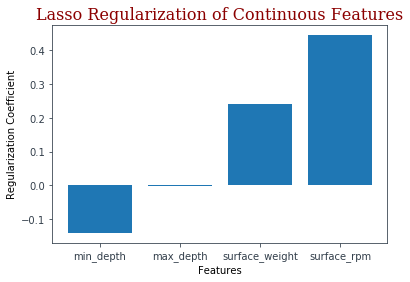

In [176]:
import matplotlib.pyplot as plt

font_title = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }

plt.bar(['min_depth', 'max_depth', 'surface_weight', 'surface_rpm'], lasso_results)
plt.xlabel("Features")
plt.ylabel("Regularization Coefficient")
plt.title("Lasso Regularization of Continuous Features", fontdict=font)

plt.savefig('/content/drive/My Drive/Datathon_2020/figures/lasso_continuous.png')